In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import SVG
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout
from keras.utils import np_utils
#from keras.utils.vis_utils import model_to_dot
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

os.environ['HTTP_PROXY'] = 'http://cachesrv.biwako.shiga-u.ac.jp:8080'

Using TensorFlow backend.


In [20]:
#CIFAR-10のデータセットのインポート
from keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
img_size = 32

#X_train = X_train.reshape(X_train.shape[0], img_size**2*3)/255
#X_test = X_test.reshape(X_test.shape[0], img_size**2*3)/255
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [5]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
n_classes = 10

y_train = np_utils.to_categorical(Y_train, n_classes)
y_test = np_utils.to_categorical(Y_test, n_classes)

In [7]:
def draw_digit3(data, n, numbers_size, label, idx, title=None):
    cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])
    
    plt.subplot(numbers_size, numbers_size, n)
    Z = data*255
    Z = data.reshape(img_size, img_size, 3)
    Z = Z[::-1][:][:]
    plt.xlim(0, img_size-1)
    plt.ylim(0, img_size-1)
    plt.imshow(Z)
    if title is not None:
        plt.title(title, size=9)
    plt.title(cifar10_labels[label[idx]])
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')

/Users/mikio/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


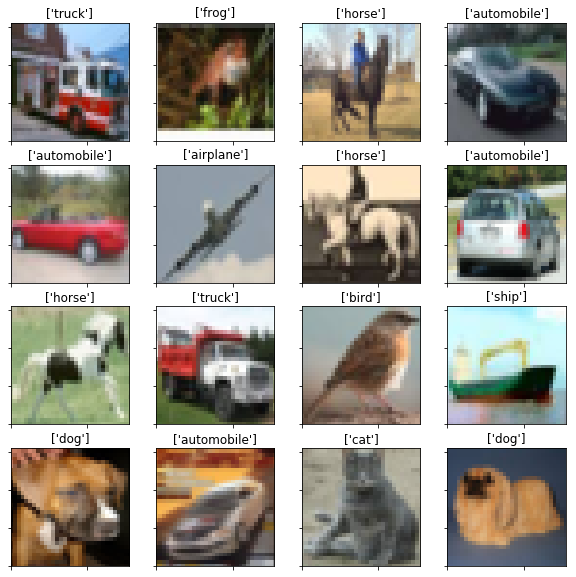

In [8]:
numbers_size = 4
plt.figure(figsize=(10, 10))
for cnt, idx in enumerate(np.random.permutation(len(X_train))[:numbers_size**2]):
    draw_digit3(X_train[idx], cnt+1, numbers_size,Y_train, idx)

In [9]:
X_train.shape[1:]

(32, 32, 3)

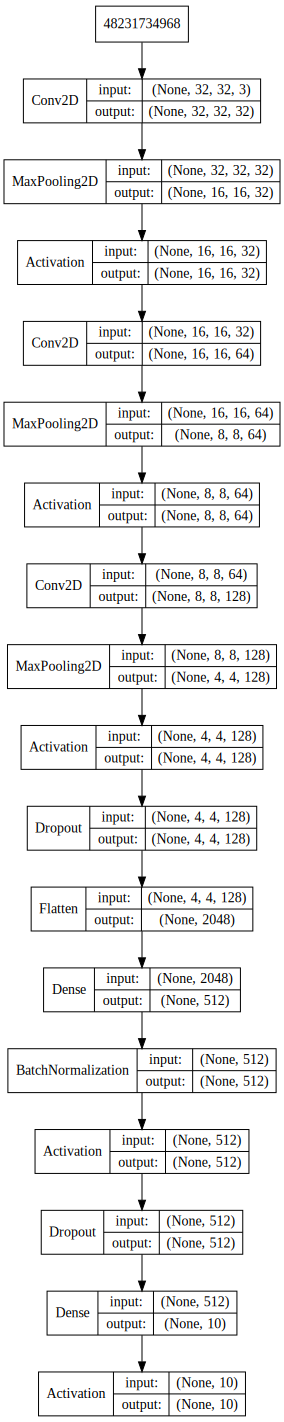

In [50]:
n_epoch = 5
b_size = 30

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(128, (3, 3), padding='same',input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False).create(prog='dot', format='svg'))

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.fit(X_train, y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test,y_test))
#score = model.evaluate(X_test, y_test, verbose=0)
y_train.shape

(50000, 10)

In [62]:
#学習データにノイズを入れてみる
X_train2 = X_train + np.random.rand(50000,32,32,3)
X_train = np.concatenate([X_train,X_train2])
X_train.shape

(100000, 32, 32, 3)

In [63]:
y_train = np.concatenate([y_train,y_train])

In [64]:
y_train.shape

(100000, 10)

In [65]:
model.fit(X_train, y_train, batch_size=b_size, epochs=n_epoch, verbose=1, validation_data=(X_test,
                                                                                          y_test))

Train on 100000 samples, validate on 10000 samples
Epoch 1/5
100000/100000 [==============================] - 239s 2ms/step - loss: 1.1422 - acc: 0.5951 - val_loss: 0.8020 - val_acc: 0.7212
Epoch 2/5
100000/100000 [==============================] - 216s 2ms/step - loss: 1.0345 - acc: 0.6341 - val_loss: 0.8391 - val_acc: 0.7067
Epoch 3/5
100000/100000 [==============================] - 206s 2ms/step - loss: 0.9717 - acc: 0.6567 - val_loss: 0.7390 - val_acc: 0.7419
Epoch 4/5
100000/100000 [==============================] - 203s 2ms/step - loss: 0.9313 - acc: 0.6704 - val_loss: 0.7150 - val_acc: 0.7520
Epoch 5/5
100000/100000 [==============================] - 200s 2ms/step - loss: 0.8853 - acc: 0.6862 - val_loss: 0.7171 - val_acc: 0.7508


In [66]:
score = model.evaluate(X_test, y_test, verbose=0)

In [67]:
score

[0.7170907936096191, 0.7508]

In [36]:
def draw_digit4(data, n, numbers_size, label, idx, title=None):
    cifar10_labels = np.array([
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'])
    
    plt.subplot(numbers_size, numbers_size, n)
    Z = data*255
    Z = data.reshape(img_size, img_size, 3)
    Z = Z[::-1][:][:]
    plt.xlim(0, img_size-1)
    plt.ylim(0, img_size-1)
    plt.imshow(Z)
    if title is not None:
        plt.title(title, size=9)
    plt.title(cifar10_labels[idx])
    plt.tick_params(labelbottom='off')
    plt.tick_params(labelleft='off')

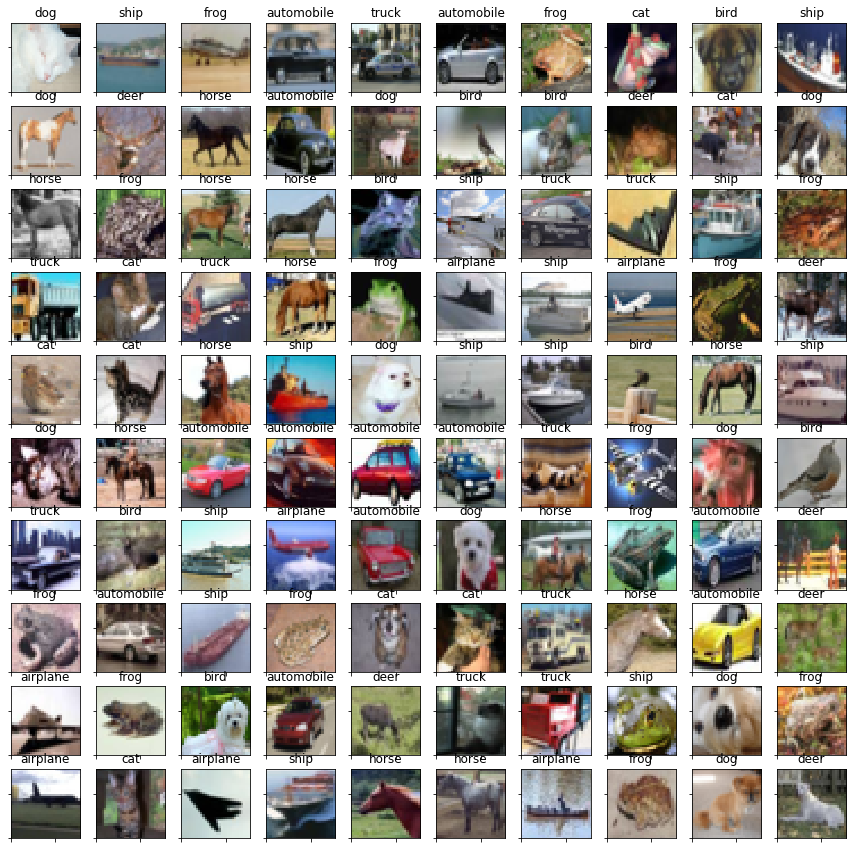

In [37]:
numbers_size = 10
plt.figure(figsize=(15, 15))
for cnt, idx in enumerate(np.random.permutation(len(X_test))[:numbers_size**2]):
    y = model.predict(X_test[int(idx):int(idx)+1], batch_size=1, verbose=0)
    #print(np.argmax(y))
    draw_digit4(X_test[idx], cnt+1, numbers_size,Y_test, np.argmax(y))